In [9]:
using LinearAlgebra
using Random
using Plots
gr()

Plots.GRBackend()

In [25]:
eye(T::Type, n) = Diagonal{T}(I, n)
eye(n) = eye(Float64, n)

eye (generic function with 2 methods)

In [5]:
n=10
N = 1000
x = range(-3, stop=3, length=n)
X = range(-4, stop=4, length=N)
y = x + 0.2 * randn(n, 1)
y[n] = -4

-4

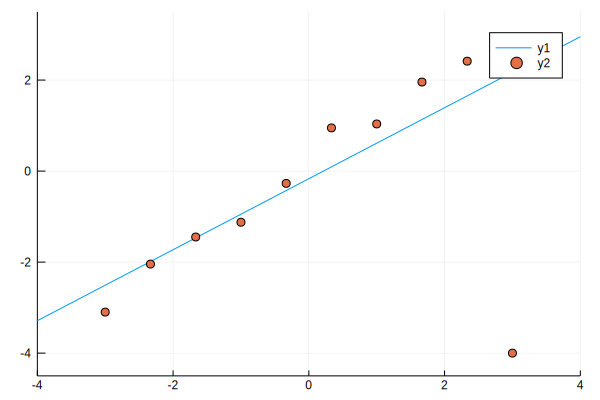

In [21]:
p = hcat(ones(n, 1), x)
t0 = p\y
e = 1

for o in 1:1000
    r = abs.(p * t0 - y)
    w = ones(n, 1)
    w[r .> e] = e ./ r[r .> e]
    t = (p' * (repeat(w, 1, 2) .* p)) \ (p'* (w .* y))
    t0 = t
    if norm(t - t0) < 0.001
        break
    end
end

P = hcat(ones(N, 1), X)
F = P * t0

plot(X, F, xlim=(-4, 4), ylim=(-4.5, 3.5))
plot!(x, y, st=:scatter)

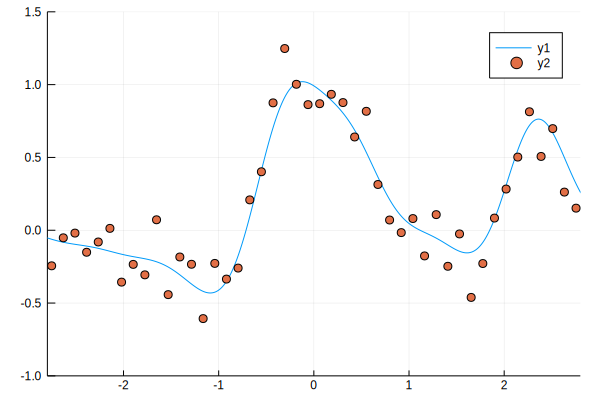

In [44]:
n = 50
N = 1000

x = range(-3, stop=3, length=n)
X = range(-3, stop=3, length=N)
pix = pi * x
y = sin.(pix) ./ (pix) + 0.1 * x + 0.2 * randn(n, 1)

hh = 2 * 0.3 ^ 2
l = 0.1
e = 0.1
t0 = randn(n, 1)
x2 = x .^ 2
k = exp.(-(repeat(x2, 1, n) + repeat(x2', n, 1) - 2 * x * x') / hh)

for o in 1:1000
    r = abs.(k * t0 - y)
    w = ones(n, 1)
    w[r .> e] = e ./ r[r .> e]
    Z = (k * (repeat(w, 1, n) .* k)) + l * pinv(diagm(0 => dropdims(abs.(t0), dims=2)))
    t = (Z + 0.000001 * eye(n)) \ (k * (w .* y))
    t0 = t
    if norm(t - t0) < 0.001
        break
    end
end

K = exp.(-(repeat(X .^ 2, 1, n) + repeat(x2', N, 1) - 2 * X * x') / hh)
F = K * t0

plot(X, F, xlim=(-2.8, 2.8), ylim=(-1, 1.5))
plot!(x, y, st=:scatter)